<a href="https://colab.research.google.com/github/rodrigomeireles/notebooks/blob/main/EquacaoDeLaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Rodrigo Meireles de Oliveira
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fixa um limite pro número máximo de iterações.
maxIter = 500

# Fixa as dimensões do problema e um delta
lenX = lenY = 20 #no caso aqui temos uma placa quadrada mas basta trocar lenX lenY pelas dimensões desejadas
#delta aqui está setado como 1 mas ao criar o meshgrid o autor não leva delta em consideração, logo se delta for qualquer coisa não inteira, o programa vai dar pau.
#ao usar np.arange pra gerar os intervalos, o autor também exclui os pontos finais de cada intervalo, a função mais apropriada é np.linspace para deltas não inteiros para que não tenhamos problemas de aproximação com floats
#uma pequena adaptação deverá ser feita em linspace pois a função não aceita deltas, apenas o número de pontos desejados no intervalo
delta = 1 

# Condições de contorno da parte superior/inferior/lateral da placa.
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 0

# Um chute qualquer de valor inicial para as temperaturas da placa
Tguess = 30

In [ ]:
# colourinterpolation fixa uma quantidade de cores para serem interpoladas no gráfico
# Alterar o valor deixará a figura com um degradê de cores mais ou menos contínuas.
# Uma função alternativa para mapear as cores seria: colourMap = plt.cm.coolwarm
colorinterpolation = 100
colourMap = plt.cm.jet

# Fixa um meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

In [ ]:
# Fixa o tamanho do array e preenche ele com o chute inicial.
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Coloca as condições de contorno simples dadas pelo autor do programa
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

Na equação de Laplace $\Delta u = 0$, uma interpretação possível é que o valor de $u$ no ponto $(x,y)$ está convergindo para a média de $u$ em sua vizinhança. O algoritmo abaixo iguala $u$ em $(i,j)$ à media dos pontos que estão ao lado e acima/abaixo de $u(i,j)$, aproximando assim cada ponto da média de seus arredores. As diagonais possivelmente poderiam ser usadas também, para uma convergência mais rápida.

In [ ]:
# Iterações do algoritmo
# Note que no algoritmo não leva em conta as bordas, deixando elas livres com temperatura fixa, isso corresponde a uma fonte de calor externa cuja temperatura não se altera devido à difusão, é possível incluir a fonte de calor
# como "vítima" da difusão mas no caso onde a fonte encontra-se a borda, é necessário fazer algumas alterações no algoritmo para que ele não procure temperaturas acima ou ao lado, saindo do grid e criando erros. Não será feito
# aqui pois também considero as fontes de calor externas à placa.
print("Aguarde um momento")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
print("Iteração terminada")

Aguarde um momento
Iteração terminada


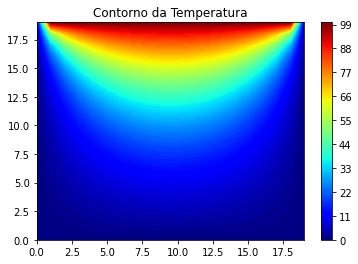

In [ ]:
# Configura o contorno da temperatura com um degradê e uma função para mapear o espectro de cores.
plt.title("Contorno da Temperatura")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Fixa a barra lateral para identificar as temperaturas pela cor
plt.colorbar()
# Mostra o resultado.
plt.show()

print("")

In [ ]:
# Condições de contorno da parte superior/inferior/lateral da placa.
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 0
# Um chute qualquer de valor inicial para as temperaturas da placa
Tguess = 30

In [ ]:
# Repetiremos a maior parte do código porém aqui usaremos np.linspace, a função mais apropriada para um espaço contínuo.
colorinterpolation = 100
colourMap = plt.cm.jet
Xseg = 100 #número de segmentações do intervalo
Yseg = 100
# Fixa linspace para um tamanho de segmentação desejado
X, Y = np.linspace(0, lenX, Xseg), np.linspace(0, lenY, Yseg)
# Fixa o tamanho do array e preenche ele com o chute inicial.
T = np.empty((Xseg, Yseg))
T.fill(Tguess)
# Coloca as condições de contorno
T[(Yseg-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (Xseg-1):] = Tright
T[:, :1] = Tleft

In [ ]:
#Uma condição interessante seriam várias fontes de calor aleatórias no meio da placa
n_sources = 2 #número de fontes de calor pontuais
sources = []
Tmin = 0   #temperatura máxima e mínima a ser sorteada para nossas fontes de calor
Tmax = 100
np.random.seed(666) #seed fixa para fins de reproducibilidade
for i in range(n_sources):
  x_random, y_random = np.random.randint(1, Xseg-1), np.random.randint(1, Yseg-1)
  sources.append((x_random, y_random))
  T[x_random][y_random] = np.random.uniform(low=Tmin, high=Tmax)

In [ ]:
#método para resolver a equação porém aqui excluiremos iterar sobre os pontos aleatórios, para que as fontes de calor sejam externas à placa assim como as bordas
print("Aguarde um momento")
for iteration in range(0, maxIter):
    for i in range(1, Xseg-1):
        for j in range(1, Yseg-1):
            if (i, j) not in sources:       
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
print("Iteração terminada")

Aguarde um momento
Iteração terminada


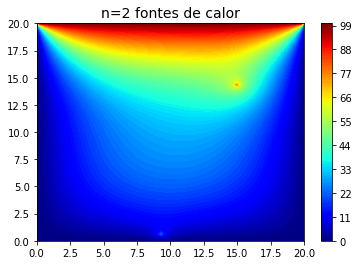

In [ ]:
# Configura o contorno da temperatura com um degradê e uma função para mapear o espectro de cores.
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Fixa a barra lateral para identificar as temperaturas pela cor
plt.colorbar()

# Mostra o resultado.
plt.title(f'n={n_sources} fontes de calor',fontsize=14, y=1)
plt.show()

print("")

Aguarde um momento
Iteração terminada


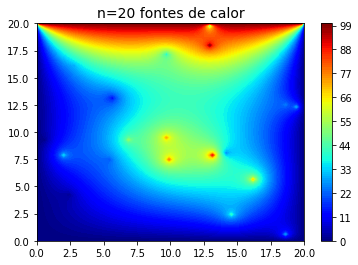


Aguarde um momento
Iteração terminada


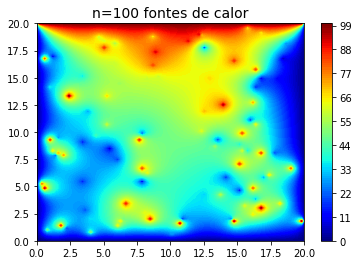

In [ ]:
#Vamos repetir o processo mais duas vezes, agora com 20 pontos e depois com 100 pontos de calor.
for i in range(2):
    T = np.empty((Xseg, Yseg))
    T.fill(Tguess)
    T[(Yseg-1):, :] = Ttop
    T[:1, :] = Tbottom
    T[:, (Xseg-1):] = Tright
    T[:, :1] = Tleft
    if i == 0:
      n_sources = 20 #número de fontes de calor pontuais
    else:
      n_sources = 100
    sources = []
    Tmin = 0   #temperatura máxima e mínima a ser sorteada para nossas fontes de calor
    Tmax = 100 
    for i in range(n_sources):
      x_random, y_random = np.random.randint(1, Xseg-1), np.random.randint(1, Yseg-1)
      sources.append((x_random, y_random))
      T[x_random][y_random] = np.random.uniform(low=Tmin, high=Tmax)
    print("Aguarde um momento")
    for iteration in range(0, maxIter):
        for i in range(1, Xseg-1):
            for j in range(1, Yseg-1):
                if (i, j) not in sources:       
                    T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
    print("Iteração terminada")
    plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

    # Fixa a barra lateral para identificar as temperaturas pela cor
    plt.colorbar()   

    # Mostra o resultado.
    plt.title(f'n={n_sources} fontes de calor',fontsize=14, y=1)
    plt.show()

    print("")